# PRACTICA 6 - DISEÑO DE FILTROS DIGITALES
#### David Alejandro Henao , Maria Camila Bravo E 

In [254]:
import scipy.signal as signal
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter, iirfilter

### 1. Creación de señal 

#### Se definieron los parametros predichos , y una señal sinoidal dentro del rango de 0 a 1000 considerando un proceso electrofisiológico registrado sobre la superficie de la piel, considerando la atenuación y el retraso temporal que experimenta al atravesar diversos tejidos.

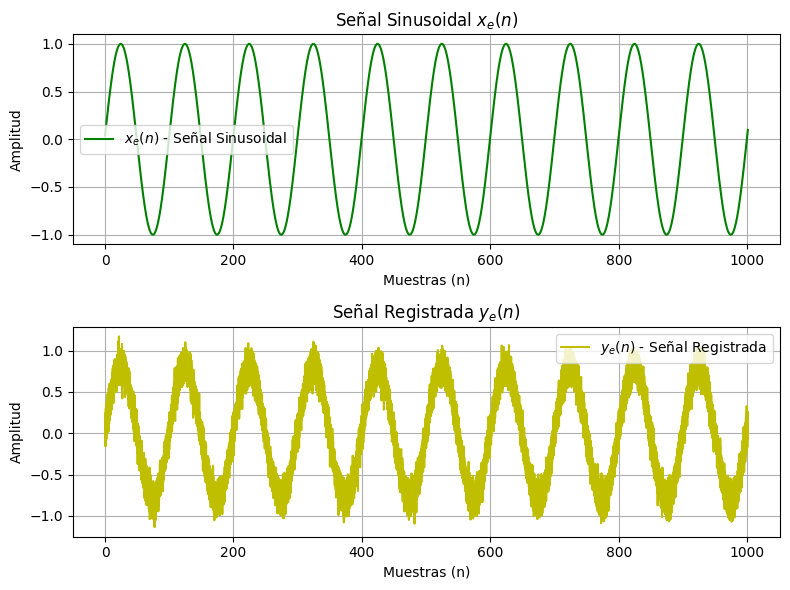

In [255]:
#PARAMETROS
F_0 = 0.01  #Frecuencia Inicial en HZ 
F_s = 25   #Frecuencia en HZ 
D = 15     #Numero de muestras 
alpha = 0.8 
sigma_squared = 0.01  #Varianza
n = np.arange(0,1001,1/F_s) #tiempo

# Generación de la señal sinusoidal x_e(n)
x_e = np.sin(2 * np.pi * F_0 *  (n + 15 / F_s))
# Generación del ruido gaussiano w(n)
w = np.random.normal(0, np.sqrt(sigma_squared), len(n))
# Generación de la señal registrada y_e(n) = 𝛼𝑥𝑒(𝑛−𝐷)+𝑤(𝑛)
y_e = alpha* x_e + w

plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1)# Gráfico de la señal original x_e(n)
plt.plot(n, x_e, label='$x_e(n)$ - Señal Sinusoidal', color='green')
plt.title('Señal Sinusoidal $x_e(n)$')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

plt.subplot(2, 1, 2)# Gráfico de la señal registrada y_e(n)
plt.plot(n, y_e, label='$y_e(n)$ - Señal Registrada', color='y')
plt.title('Señal Registrada $y_e(n)$')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

# Mostrar las gráficas
plt.tight_layout()
plt.show()


### 2. Diseño de un Filtro 

####  1. FILTRO FIR

#### Considerando lo principales parametros de entrada  N: Orden del filtro y W_n: Frecuencia de corte. Se tiene que para filtros digitales W_n está normalizado entre 0 y 1, esto se obtiene dividiendo la frecuencia de muestreo sobre dos. Para Obtener los filtros se usa la función Firwin.

In [256]:
#PARAMETROS 
orden = 30
fc = 1.25
fc2= 7.5
fs = 25
nyquist = fs/2
wn1 = fc/nyquist
wn2= fc2/nyquist

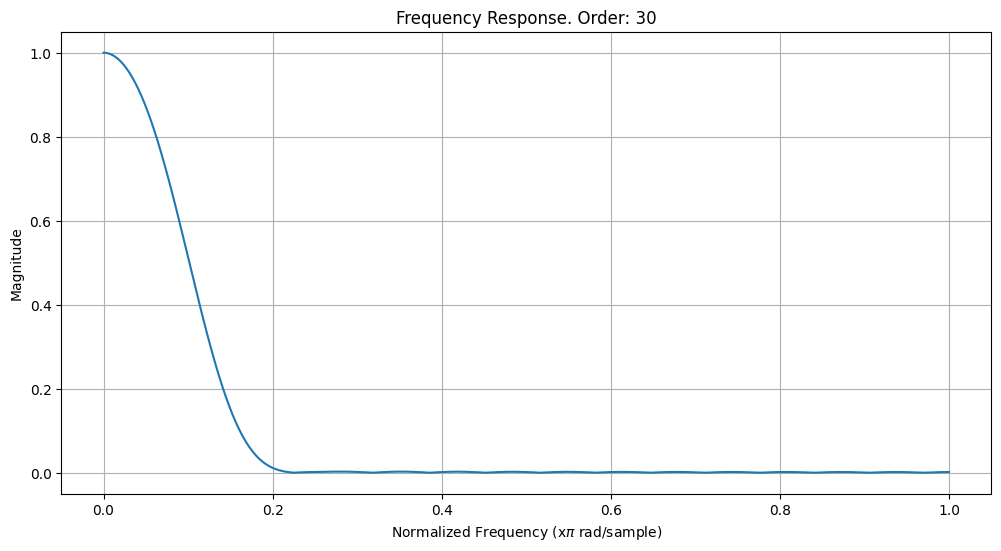

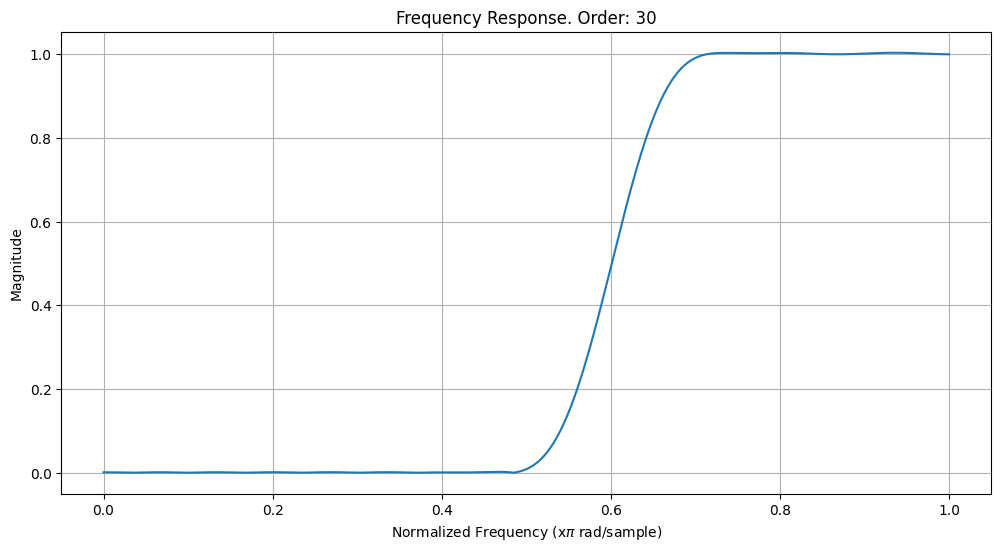

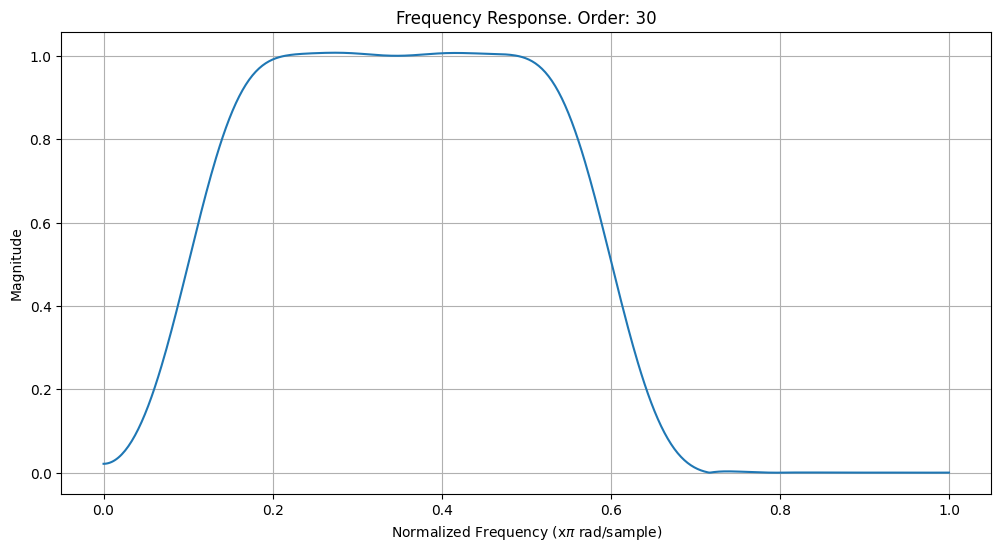

In [257]:
# FIR pasa bajas
FIRpasabajas = signal.firwin(orden + 1, wn1, pass_zero='lowpass', window='hamming')
y_e_fir_low = signal.lfilter(FIRpasabajas, 1.0, y_e)

# FIR pasa altas
FIRpasaltas = signal.firwin(orden + 1, wn2, pass_zero=False, window='hamming')
y_e_fir_high = signal.lfilter(FIRpasaltas, 1.0, y_e)

# FIR pasa banda
FIRpasabanda = signal.firwin(orden + 1, [wn1, wn2], pass_zero=False, window='hamming')
y_e_fir_band = signal.lfilter(FIRpasabanda, 1.0, y_e)

# Función para graficar las respuestas en frecuencia
def graficar_rpta(b, a, orden, nyq_rate=1):
    w, h = signal.freqz(b, a)
    plt.figure(figsize=(12, 6))
    plt.plot((w / max(w)) * nyq_rate, abs(h))
    plt.ylabel('Magnitude')
    plt.xlabel(r'Normalized Frequency (x$\pi$ rad/sample)')
    plt.title(r'Frequency Response. Order: ' + str(orden))
    plt.grid(True)
    plt.show()

# Gráficas de las respuestas en frecuencia para cada filtro
graficar_rpta(FIRpasabajas, 1, orden)
graficar_rpta(FIRpasaltas, 1, orden)
graficar_rpta(FIRpasabanda, 1, orden)



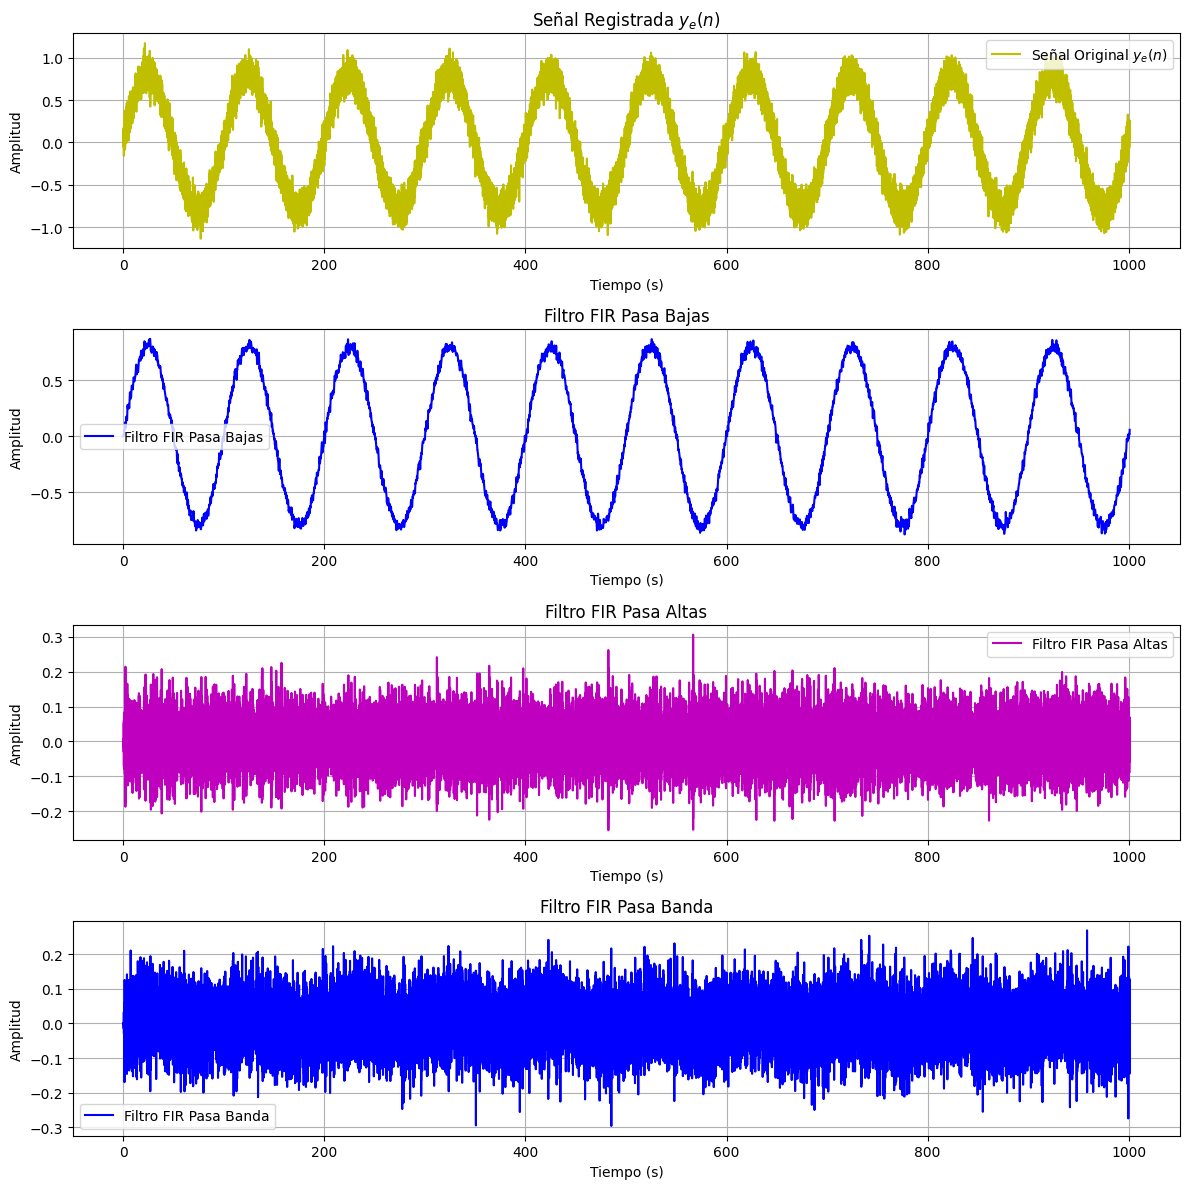

In [258]:
# --- Gráficas de resultados ---
plt.figure(figsize=(12, 12))

# Señal original
plt.subplot(4, 1, 1)
plt.plot(n, y_e, label='Señal Original $y_e(n)$', color='y')
plt.title('Señal Registrada $y_e(n)$')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

# FIR pasa bajas
plt.subplot(4, 1, 2)
plt.plot(n, y_e_fir_low, label='Filtro FIR Pasa Bajas', color='blue')
plt.title('Filtro FIR Pasa Bajas')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

# FIR pasa altas
plt.subplot(4, 1, 3)
plt.plot(n, y_e_fir_high, label='Filtro FIR Pasa Altas', color='m')
plt.title('Filtro FIR Pasa Altas')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

# FIR pasa banda
plt.subplot(4, 1, 4)
plt.plot(n, y_e_fir_band, label='Filtro FIR Pasa Banda', color='b')
plt.title('Filtro FIR Pasa Banda')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

# Mostrar todas las gráficas
plt.tight_layout()
plt.show()

#### ¿Qué cambios hay en los argumentos de la función para implementar un filtro pasa banda y pasa altas? 
- Filtro pasa altas: Se añade el argumento pass_zero=False que indica que el filtro no pasará las componentes de frecuencia cero, convirtiéndose en un filtro pasa altas. Es necesario también especificar la frecuencia de corte, que debe estar normalizada (es decir, dividida por la frecuencia de Nyquist). Este filtro mide el grado maximo a las caracteristicas de la frecuencia [1][2]
- Filtro pasa banda: Al igual que en el filtro pasa altas, se utiliza pass_zero=False para asegurar que solo las frecuencias dentro del rango definido por los puntos de corte sean permitidas, mientras que las frecuencias por debajo de cutoff_low y por encima de cutoff_high son atenuadas.
- En esta misma linea de codigo tambien se puede implementar ventanas ya que pueden modificar la respuesta del filtro.

#### Observaciones:
- Se observa que existen cambios en los filtros pasa bandas y pasa Altas en comparacion a la señal original , mientras que el filtro de pasa bajas sigue la forma de la señal original con mucho menos ruido lo cual podria indicar que este es el filtro mas efectivo para esta señal permitiendo visualizarla mejor. La frecuencia fundamental es bastante pequeña por lo tanto se visualiza mas ruido gaussiano.

#### 2. FILTRO IIR

La función iirfilter permite diseñar un filtro IIR, usando los parametros anteriores se disena el filtro IRR para Pasa bajas, altas y Banda.

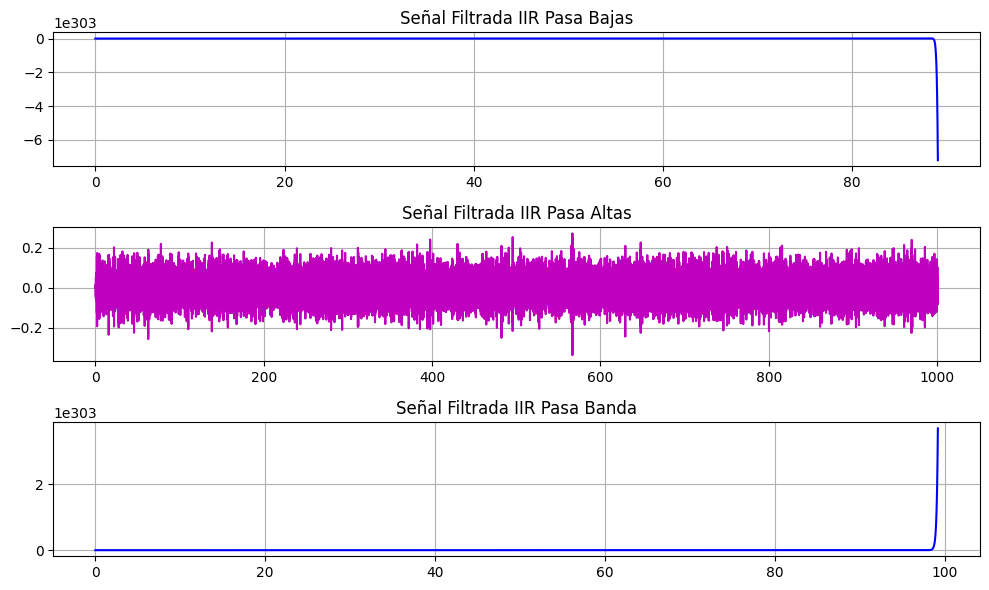

In [259]:
ordenIIR = 30
IIR_pasabajas = iirfilter(ordenIIR, wn1,  btype='low')
IIR_pasaltas = iirfilter(ordenIIR, wn2, btype='high')
IIR_pasabandas = iirfilter(ordenIIR, [wn1,wn2], btype='band')

                           
#filtros IIR a la señal ye(n)
y_e_iir_lowpass = lfilter(IIR_pasabajas[0], IIR_pasabajas[1], y_e)
y_e_iir_highpass = lfilter(IIR_pasaltas[0], IIR_pasaltas[1], y_e)
y_e_iir_bandpass = lfilter(IIR_pasabandas[0], IIR_pasabandas[1], y_e)

plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(n, y_e_iir_lowpass,color='blue')
plt.title('Señal Filtrada IIR Pasa Bajas')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(n, y_e_iir_highpass, color='m')
plt.title('Señal Filtrada IIR Pasa Altas')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(n, y_e_iir_bandpass,color='b')
plt.title('Señal Filtrada IIR Pasa Banda')
plt.grid(True)

plt.tight_layout()
plt.show()

### Se ve una respuesta totalmente inestable debido al orden del filtro, por ello corremos el código nuevamente con un orden = 5

#### Observaciones: 
En las graficas se muestran las señales originales y filtradas para comparar la efectividad de cada tipo de filtro, En las gráficas se muestran las señales originales y filtradas para comparar la efectividad de cada tipo de filtro. Se puede observar que el filtro IIR da mejores resultados en comparación con el filtro anterior, especialmente en términos de reducción de ruido y la preservación de características relevantes de la señal. Se visualiza un comportamiento transitorio más notable,
 
- FIltro Pasa bajas permite el paso de señales con frecuencias por debajo de un valor de 1,25 muestras y atenua las frecuencias mayores por esto se puede notar mayor amplitud siendo una onda mas plana porque elimina los picos de la frecuencia. 
- Pasa Altas permite solo el paso de las  frecuencias por encima del valor 7,5 muestras , en la grafica se muestra que  las frecuencias inferiores son bajas o prácticamente inexistentes.
- filtro pasa banda solo permite el paso de el rango especifico. En la grafica se muestra que estas frecuencias fueron atenuadas. El aumento en la amplitud de la señal filtrada a partir de la muestra 700 en el filtro pasa banda podría deberse a la presencia de frecuencias relevantes dentro del rango de corte del filtro,

En la comparación entre filtros FIR e IIR, los FIR son más estables y lineales en fase, aunque requieren un mayor orden (más coeficientes) para lograr una respuesta de filtrado similar a la de un IIR. Por otro lado, los IIR, al necesitar un orden menor, alcanzan la misma respuesta con menos coeficientes para las condiciones dadas (no siempre es asi), pero son más susceptibles a la inestabilidad, especialmente en órdenes altos. En la práctica, al aumentar el orden del filtro IIR a 30, se observó inestabilidad, manifestada como amplificación excesiva y respuestas incorrectas. Esto obligó a reducir el orden del IIR para obtener una respuesta estable, destacando que los FIR suelen ser la mejor opción en aplicaciones que demandan estabilidad y precisión en la respuesta de fase

### 3. Filtrado 
 

#### Las funciones lfilter y filtfilt filtran una secuencia de información x(n) usando un filtro IIR o FIR.  Se pruaba las funciones con Pasa bajas FIR e IIR

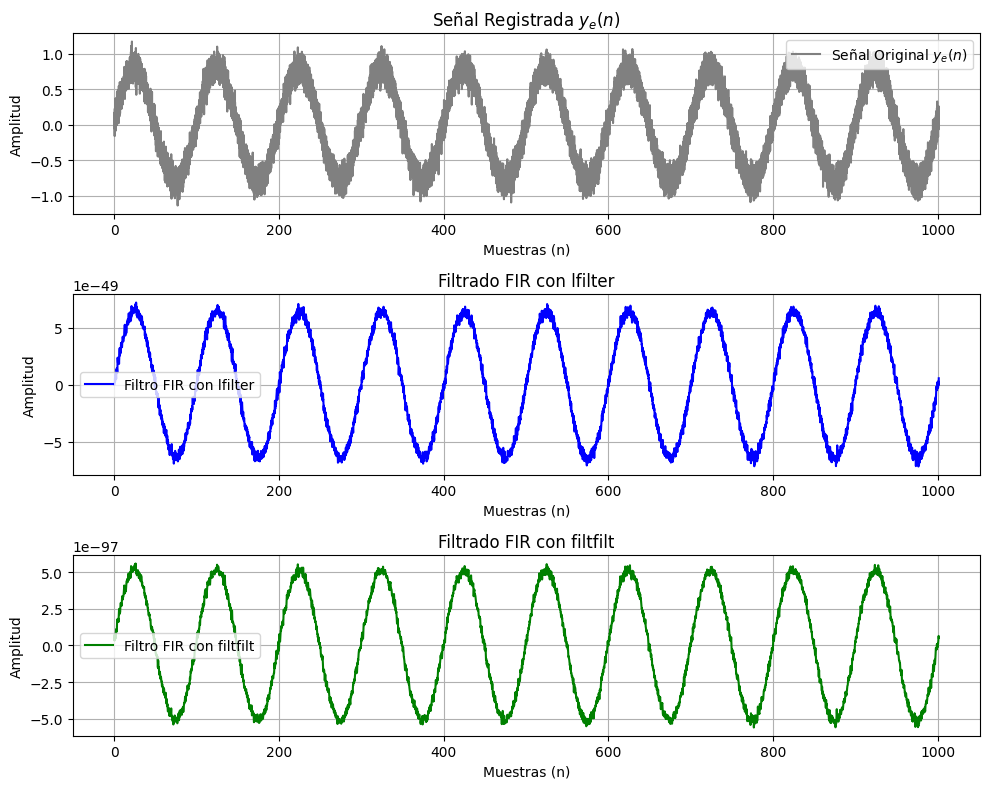

In [260]:
# Filtrado FIR usando lfilter
y_e_fir_low_lfilter = lfilter(b_low, 1.0, y_e)

# Filtrado FIR usando filtfilt
y_e_fir_low_filtfilt = signal.filtfilt(b_low, 1.0, y_e)

# Gráficas para FIR
plt.figure(figsize=(10, 8))

plt.subplot(3, 1, 1)
plt.plot(n, y_e, label='Señal Original $y_e(n)$', color='gray')
plt.title('Señal Registrada $y_e(n)$')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(n, y_e_fir_low_lfilter, label='Filtro FIR con lfilter', color='blue')
plt.title('Filtrado FIR con lfilter')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(n, y_e_fir_low_filtfilt, label='Filtro FIR con filtfilt', color='green')
plt.title('Filtrado FIR con filtfilt')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


### ¿Por qué se utiliza sólo el numerador? ¿A qué hace referencia el numerador? 

Se utiliza solo el numerador porque este diseño no incluye retroalimentación. En los filtros FIR, la salida es una combinación lineal de las entradas actuales y pasadas, sin depender de las salidas anteriores. Este tipo de filtro, al tener una respuesta finita al impulso, significa que su salida eventualmente se desvanecerá a cero después de un número limitado de muestras. El numerador representa los coeficientes que determinan esta respuesta al impulso, haciendo referencia a cómo las muestras de entrada afectan a la salida del filtro.

### ¿Evidencia cambios en el uso de las funciones de filtrado? ¿Cómo se puede explicar la falta de coincidencia? 

En la grafica se puede evidenciar cambios en el uso de las funciones filtradas , se observa que con el Fitrado Filtfilt no hay desfase , mientras con el ifilter si lo hay . Esto se debe  a que la salida del filtro ifilter depende de las muestras pasadas, causando así cierta distorsión temporal. Por otro lado, filtfilt aplica el filtro en ambas direcciones, hacia adelante y hacia atrás, eliminando el desfase y logrando una mejor conservación de la forma original de la señal. Sin embargo, filtfilt puede generar efectos de borde en los extremos de la señal debido a su proceso de doble paso.

### ¿Es adecuado el orden del filtro usado? Analice.
El orden 30 para el filtro FIR es adecuado ya que permite una buena precisión, pero si se e se podría aumentar el orden del filtro para una mejor definición en la banda de paso o corte. Aunque esto aumenta el uso de recursos y memoria.




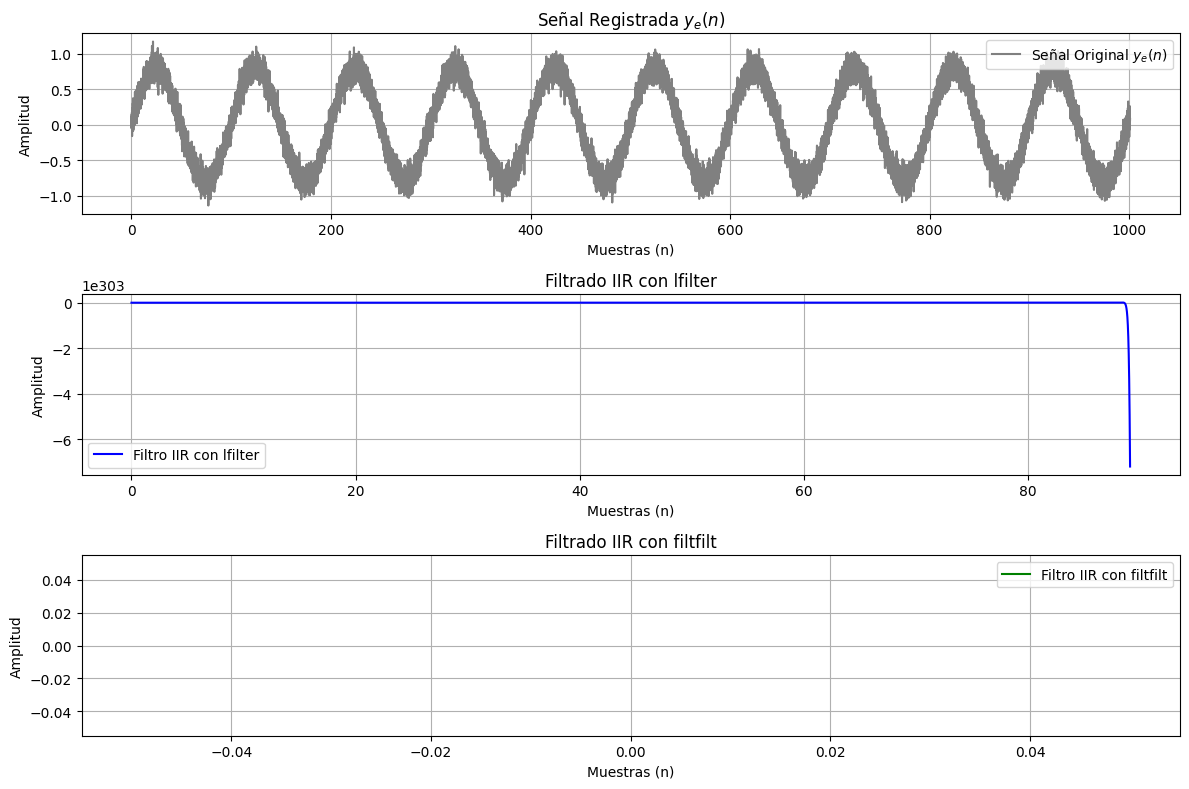

In [261]:
# Filtrado IIR usando lfilter
y_e_iir_low_lfilter = lfilter(b_iir_low, a_iir_low, y_e)

# Filtrado IIR usando filtfilt
y_e_iir_low_filtfilt = signal.filtfilt(b_iir_low, a_iir_low, y_e)

# Gráficas para el filtro IIR
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(n, y_e, label='Señal Original $y_e(n)$', color='gray')
plt.title('Señal Registrada $y_e(n)$')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(n, y_e_iir_low_lfilter, label='Filtro IIR con lfilter', color='blue')
plt.title('Filtrado IIR con lfilter')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(n, y_e_iir_low_filtfilt, label='Filtro IIR con filtfilt', color='green')
plt.title('Filtrado IIR con filtfilt')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


### ¿Por qué se utiliza el numerador y denominador? ¿Es necesario cambiar el orden del filtro? En tal caso hágalo y analice. 

#### En los filtros IIR, el numerador representa los coeficientes de la parte de entrada, mientras que el denominador corresponde a los coeficientes de retroalimentación. Como estos filtros tienen una respuesta infinita al impulso, las salidas dependen de sus valores anteriores.

#### Si se requiere una mayor atenuación en las bandas de paso o corte, podría ser necesario ajustar el orden del filtro IIR. Generalmente, los filtros IIR necesitan un orden menor que los FIR para lograr una respuesta similar, aunque la estabilidad de los IIR también puede depender de un orden adecuado.

#### Con lfilter(IIR) se produce un desfase similar al de los FIR, aunque los IIR son más eficientes en términos de recursos al usar órdenes menores. Al emplear filtfilt(IIR), se elimina el desfase pero, al igual que en los FIR, pueden aparecer efectos de borde. En este caso, un orden típico como el 4 es adecuado, aunque puede ajustarse si es necesario.

### 4. APLICACIÓN

Carga de la señal, canal 1 y definicion de la Fs

In [262]:
fs=500
#ruta = "c:\\Users\\User\\OneDrive - Universidad de Antioquia\\David\\2024 - 2\\Bioseñales\\lab\\Practica 6"
#datos = np.loadtxt("c:\\Users\\User\\OneDrive - Universidad de Antioquia\\David\\2024 - 2\\Bioseñales\\lab\\Práctica 6\\senal_filtros.txt") 
ruta = "/Users/mcamilabravo/Documents/Universidad 2024:2/Biosenales/Practica 6"
datos = np.loadtxt("/Users/mcamilabravo/Documents/Universidad 2024:2/Biosenales/Practica 6/senal_filtros.txt")

datos
canal1 = datos[:,0]
print("Forma de la señal cargada:", canal1.shape)
print("Tamaño de la señal cargada:", canal1.size)
canal1

Forma de la señal cargada: (60000,)
Tamaño de la señal cargada: 60000


array([-7.0306, -7.0157, -7.0426, ..., -7.5644, -7.5477, -7.5434])

Realice un análisis frecuencial con la función que permite calcular el periodograma de Welch de una señal ¿Hay presencia de ruido eléctrico? Analice

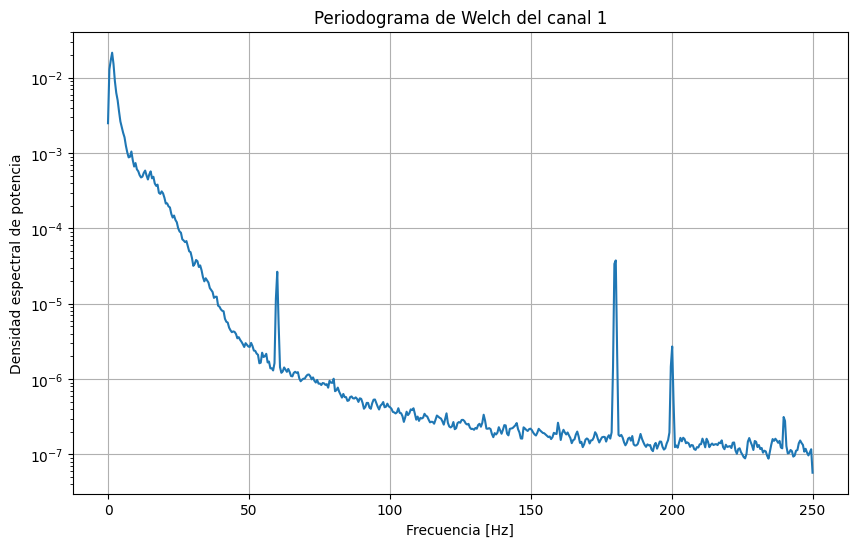

En el periodograma resultante, se observa el pico en 60 caracteristico del ruido producido por la red electrica


In [263]:
f, Pxx_den = signal.welch(canal1, fs, nperseg=1024)# Calcular el periodograma de Welch
plt.figure(figsize=(10, 6))# Graficar el periodograma
plt.semilogy(f, Pxx_den)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad espectral de potencia')
plt.title('Periodograma de Welch del canal 1')
plt.grid(True)
plt.show()

print('En el periodograma resultante, se observa el pico en 60 caracteristico del ruido producido por la red electrica')

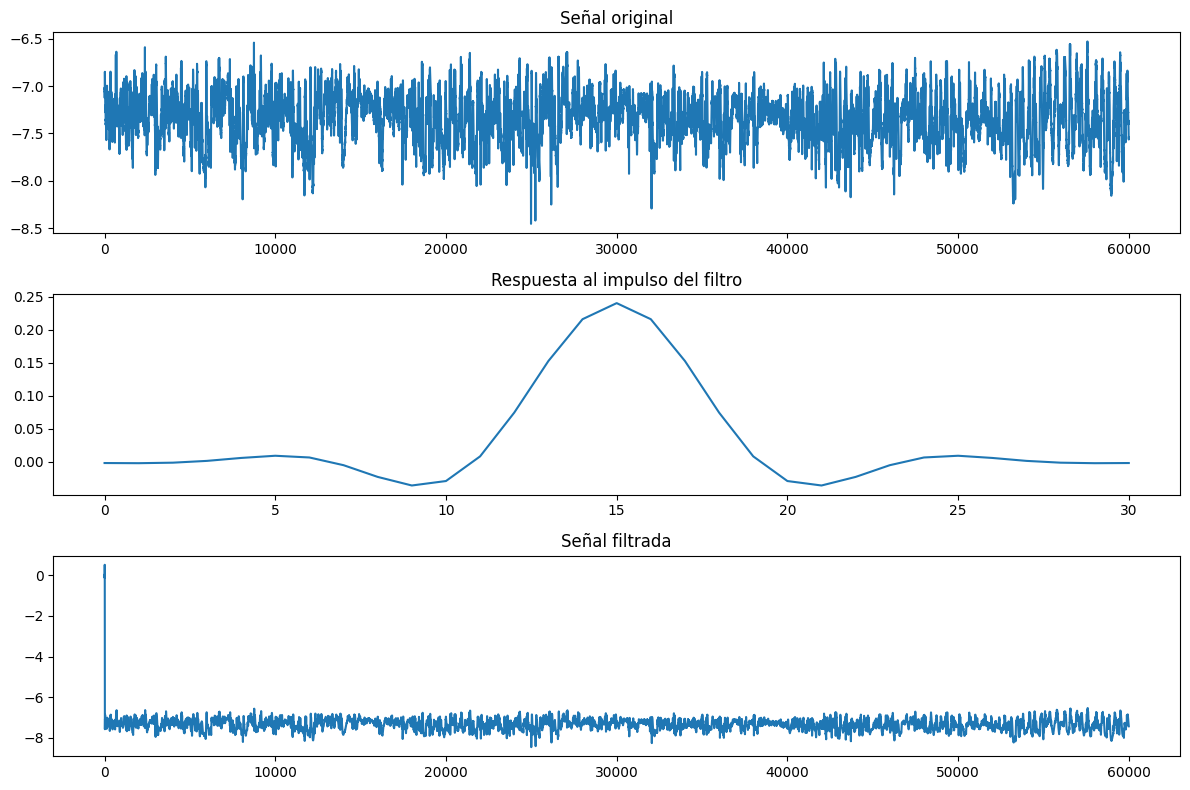

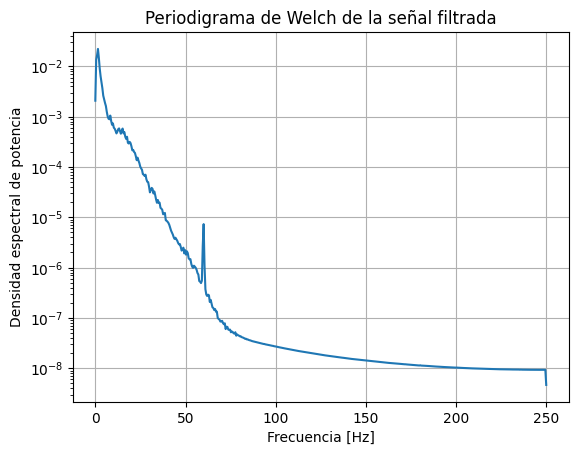

In [264]:
# Parámetros del filtro
frecuencia_corte = 60  # Frecuencia de corte para eliminar ruido
orden_filtro = 30  # Orden del filtro
ventana = 'hamming'  # Ventana

# Diseño del filtro FIR
coeficientes_filtro = signal.firwin(orden_filtro+1, frecuencia_corte / (fs / 2), window=ventana)

# Aplicación del filtro FIR a la señal
señal_filtrada = signal.lfilter(coeficientes_filtro, 1, canal1)

# Visualización
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(canal1)
plt.title('Señal original')

plt.subplot(3, 1, 2)
plt.plot(coeficientes_filtro)
plt.title('Respuesta al impulso del filtro')

plt.subplot(3, 1, 3)
plt.plot(señal_filtrada)
plt.title('Señal filtrada')

plt.tight_layout()
plt.show()

# Análisis en frecuencia
frecuencia, densidad_espectral_filtrada = signal.welch(señal_filtrada, fs, nperseg=1024, window='hamming')
plt.figure()
plt.semilogy(frecuencia, densidad_espectral_filtrada)
plt.title('Periodigrama de Welch de la señal filtrada')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad espectral de potencia')
plt.grid(True)
plt.show()


### Observaciones: 
 #### Se Observa que la señal original tiene ruido con alta frecuencia, y al aplicar el filtro pasa-bajas se han reflejado cambios disminuyendo el ruido notoriamente siendo suavizada. Ademas la respuesta al impulso del filtro confirma que estamos ante un filtro pasa-bajos Además, la respuesta al impulso del filtro confirma su función como pasa-bajos, ya que atenúa eficazmente las frecuencias altas y permite que las bajas pasen sin alteraciones  demostrando que el filtro cumplio su proposito.

### Conclusiones  

- #### Los filtros digitales representan una herramienta ideal para el  procesamiento de señales, permitiéndonos manipular con precisión sus características frecuenciales, ademas no dependen de componente fisicos lo cual no tiene errores por tolerancia. 
- #### Se observo que los filtros pasa altas son utiles para eliminar ruido de baja frecuencia, mientras que los filtros pasa banda son eficaces para enfocarse en un rango específico de frecuencias. 
- #### Los filtros FIR son una excelente opción cuando se necesita que la señal mantenga su forma y coherencia en el tiempo son mas fáciles de diseñar, ofrecen una respuesta en fase lineal, lo que significa que todas las frecuencias se procesan de manera uniforme. Mientras que los filtros IIR son más eficientes en términos de recursos. Utilizan un menor número de coeficientes para alcanzar resultados similares, lo que facilita su implementación, pero puede llevar a distorsiones en la fase. 

#### REFERENCIAS

1. Diapositivas de clase 
2. Pysdr (n.d.), los filtros digitales se dividen en dos categorías principales: FIR e IIR, donde cada uno presenta características y ventajas distintas. https://pysdr.org/es/content-es/filters.html
3. Editorial Redipe. (n.d.). Título del documento. Recuperado de https://editorial.redipe.org/index.php/1/catalog/download/129/229/4655?inline=1